# Analyze *falcon* clusters

This notebook can be used to analyze clusters generated by *falcon*. For the moment, it can:
* Show stats about the clusters: the number of clusters, the average size...
* Plot

In [4]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import re
import spectrum_utils.plot as sup

from ms_io import ms_io

### Open the file and show basic stats

In [7]:
file = "/media/maesk/WD/falcon/CCLE_10M/clusters.csv"
df = pandas.read_csv(file)
clustMask = df['cluster'] != -1
clustDf = df[clustMask]
nClusteredSp = len(clustDf)
propClusteredSp = nClusteredSp/len(df)
nClusters = np.max(clustDf['cluster']) + 1

print("Number of (non filtered) input spectra: {}".format(len(df)))
print("Number of clustered spectra: {0} ({1:.2f}%)".format(nClusteredSp, propClusteredSp*100))
print("Number of clusters: {}".format(nClusters))
print("Spectra per cluster: {}".format(nClusteredSp/nClusters))

Number of (non filtered) input spectra: 9789672
Number of clustered spectra: 2562666 (26.18%)
Number of clusters: 638405
Spectra per cluster: 4.01416968852061


### Plot the n first clusters

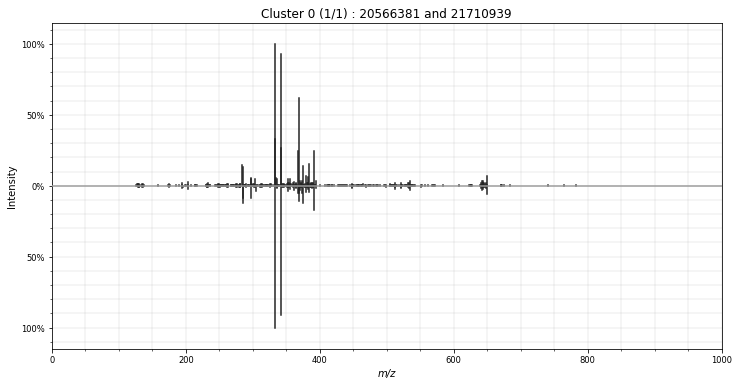

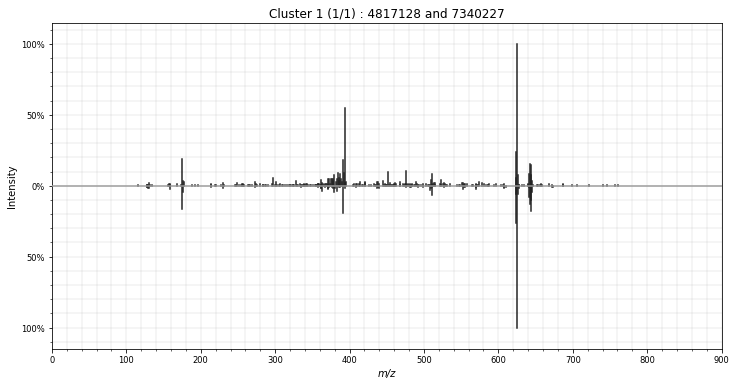

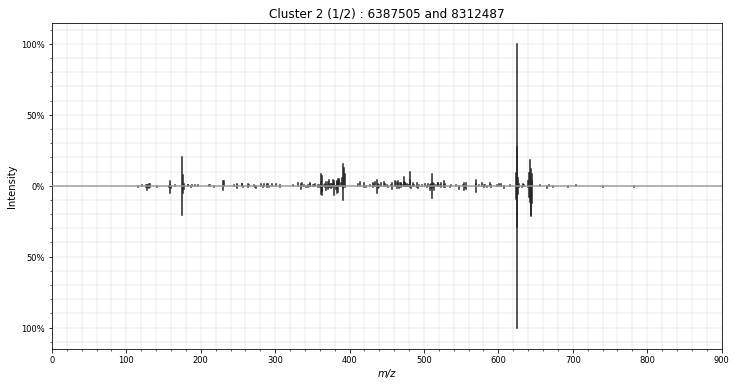

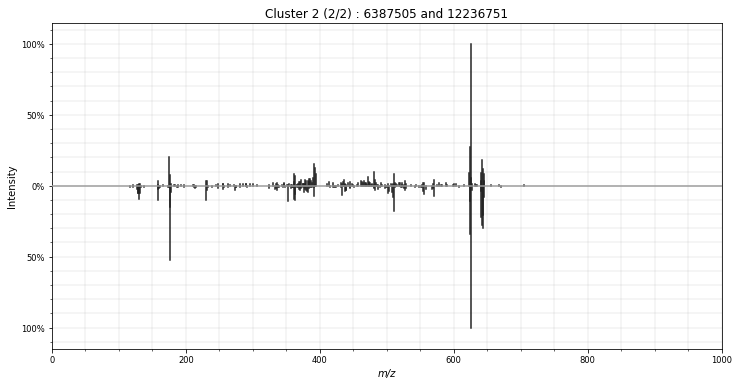

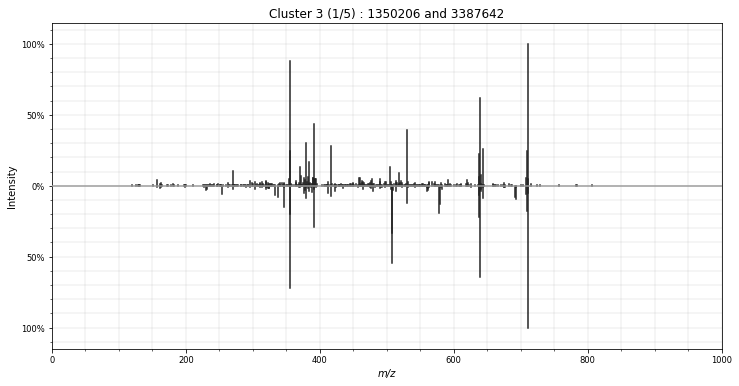

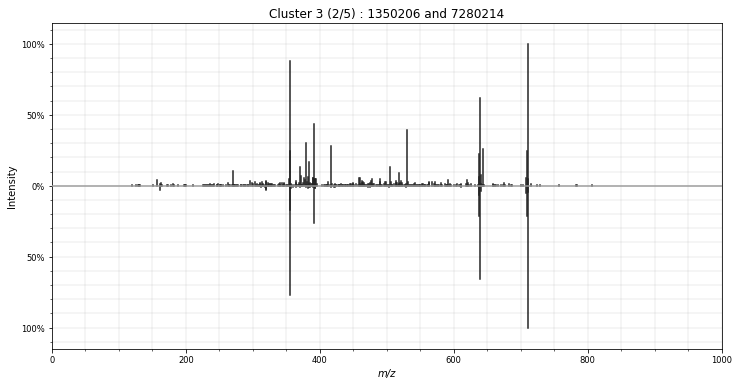

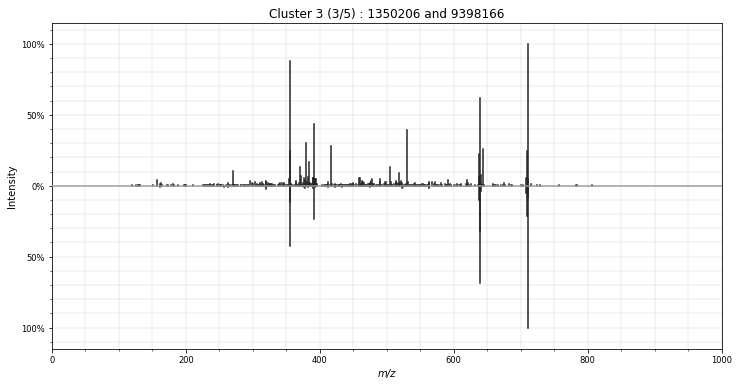

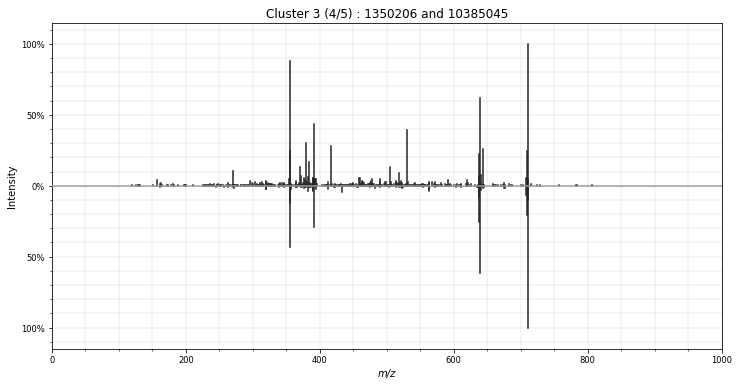

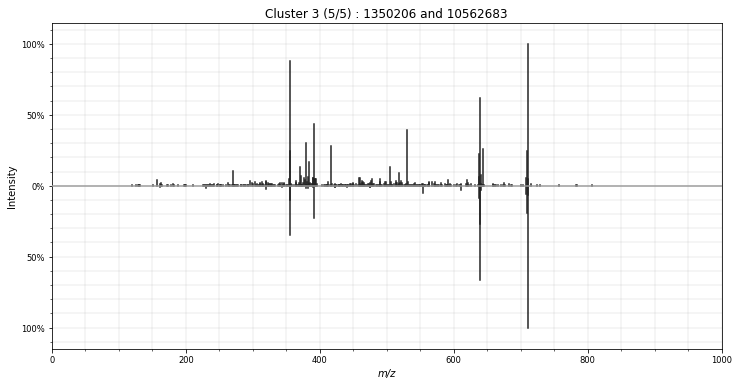

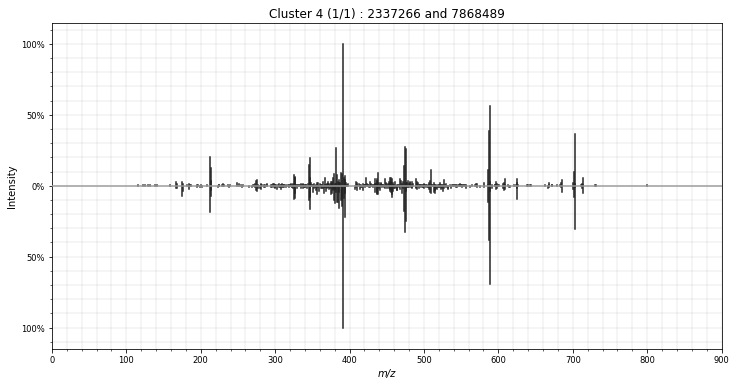

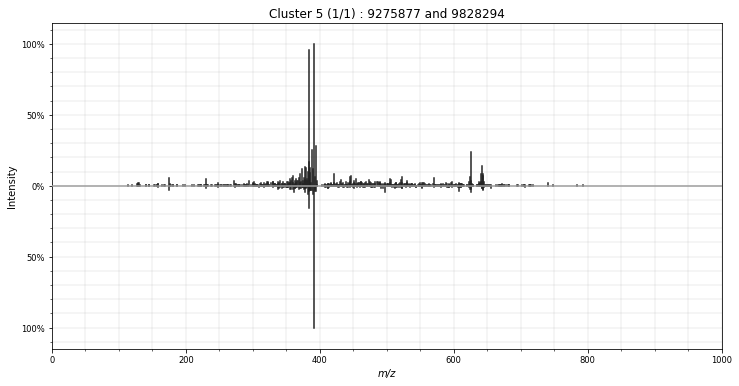

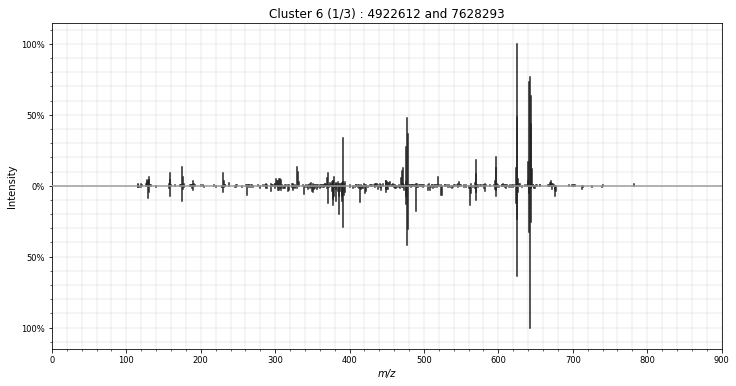

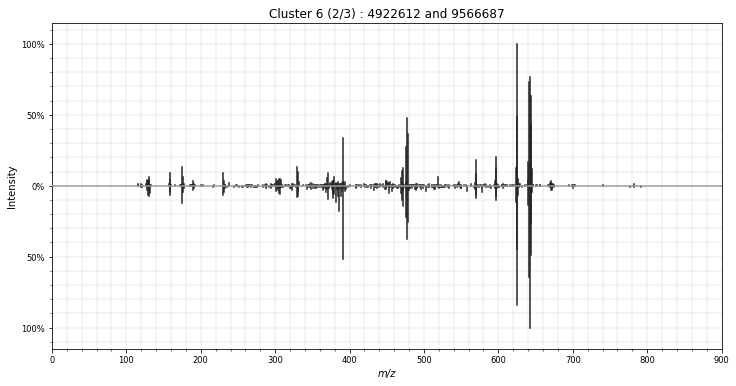

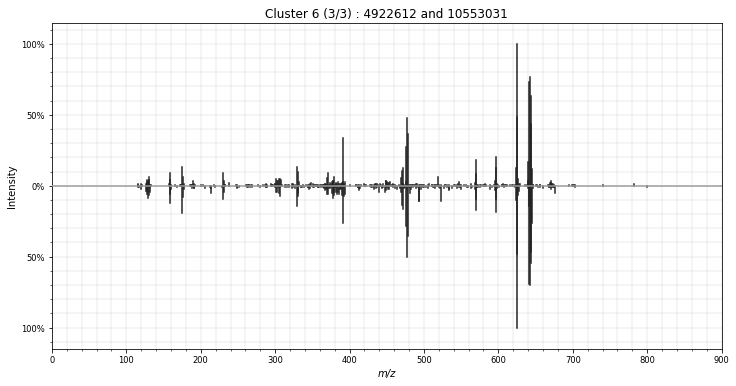

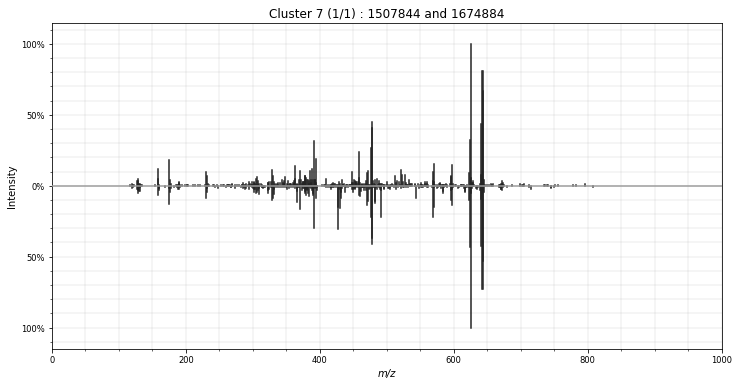

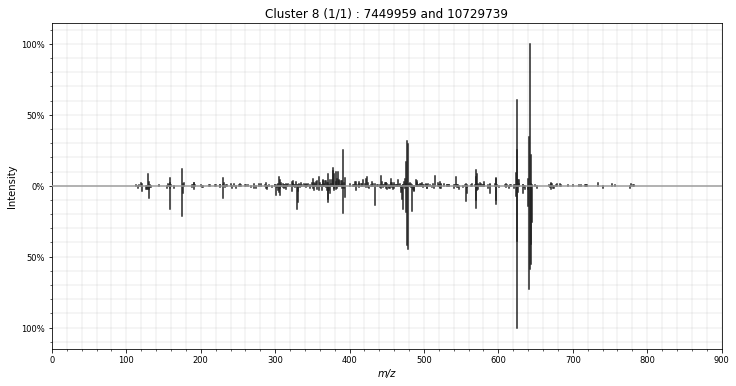

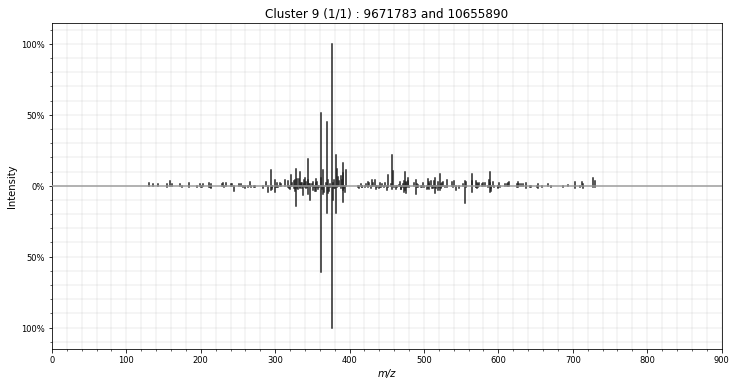

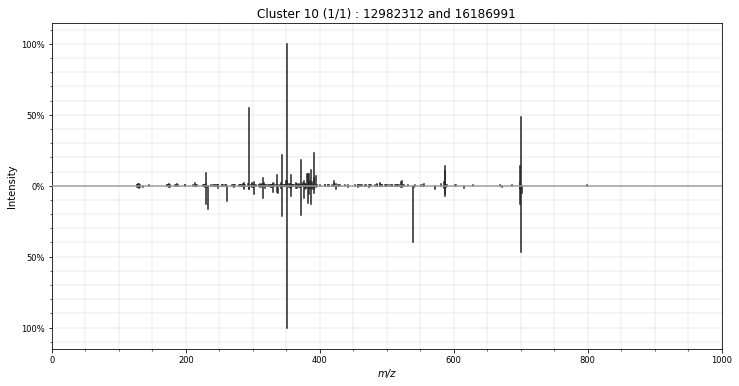

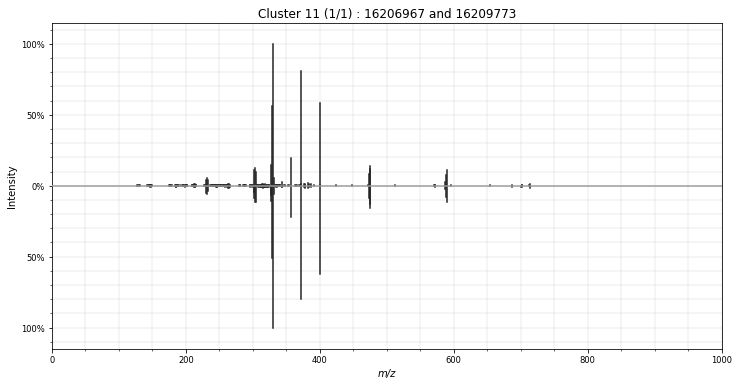

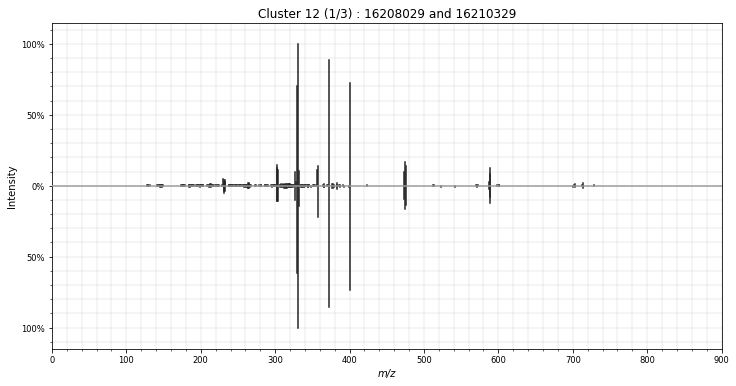

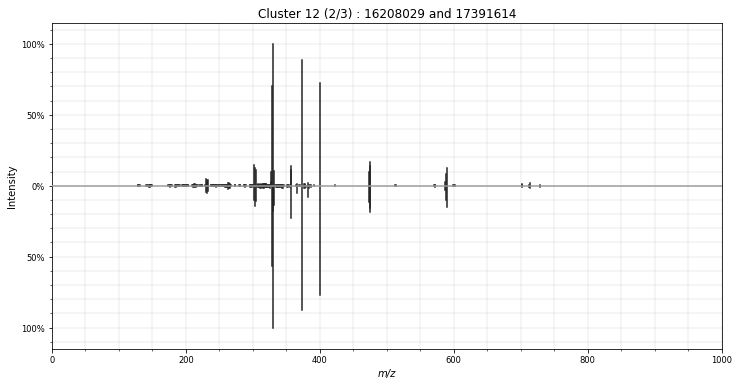

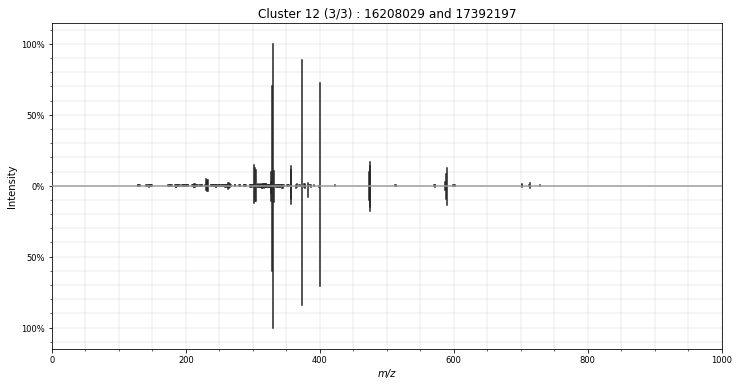

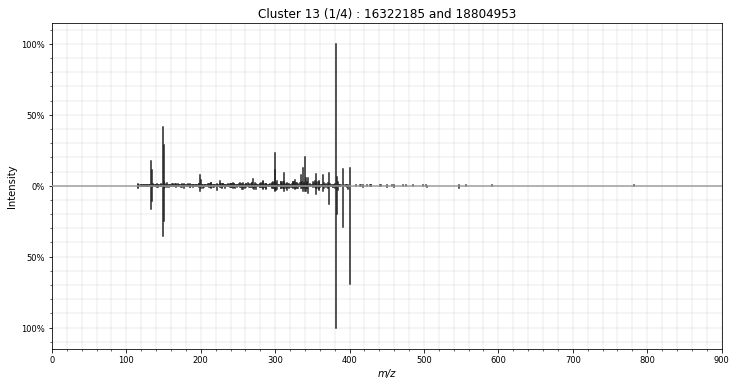

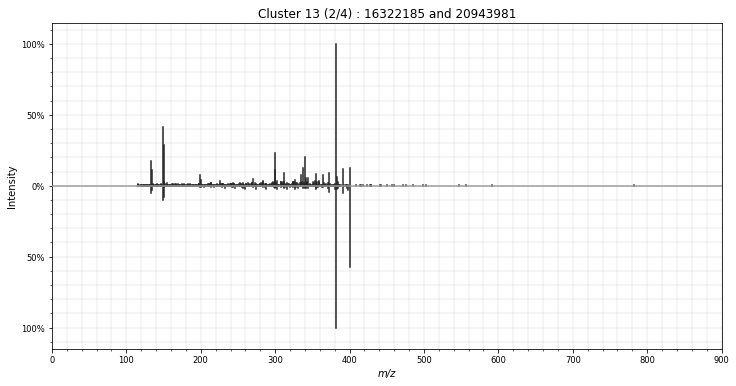

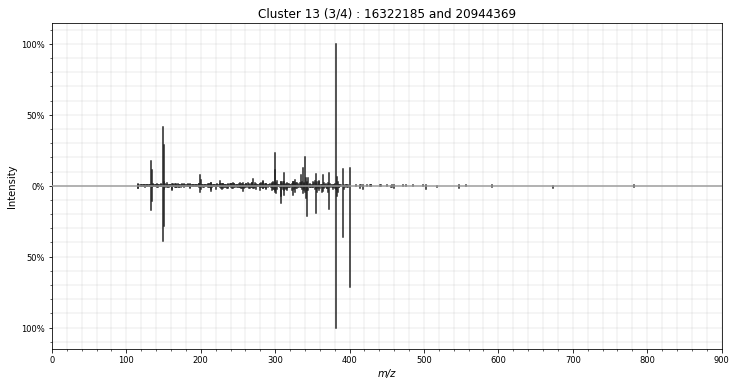

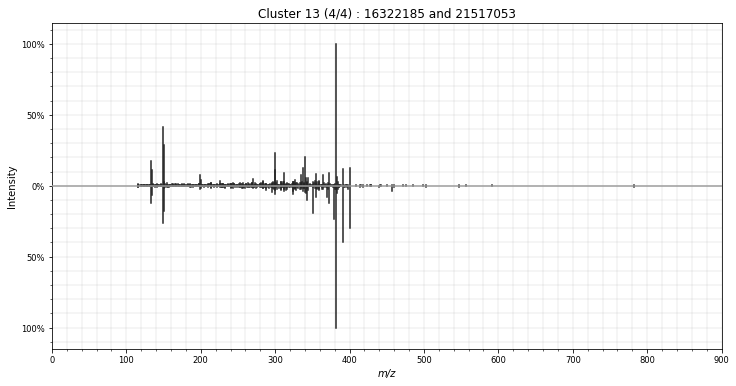

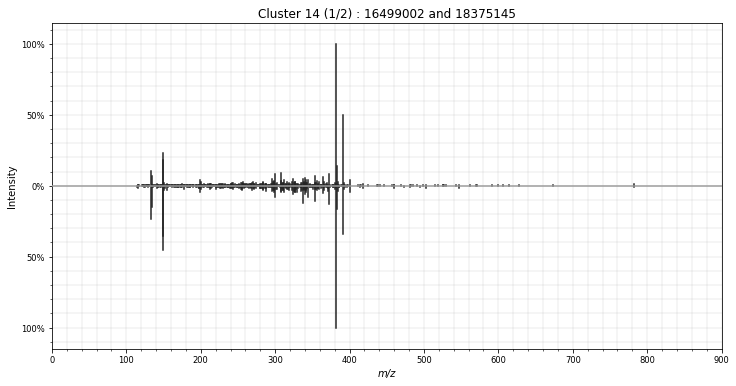

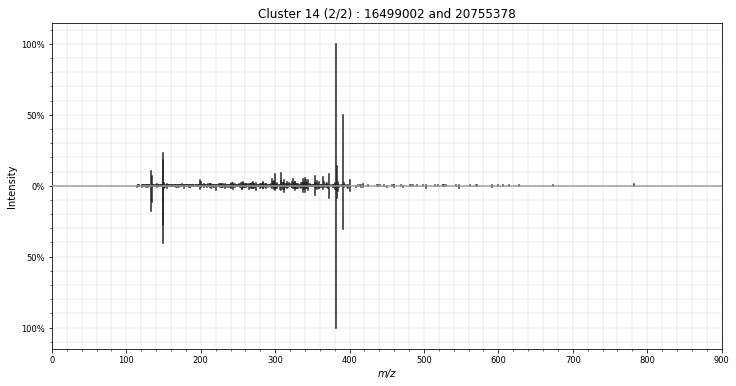

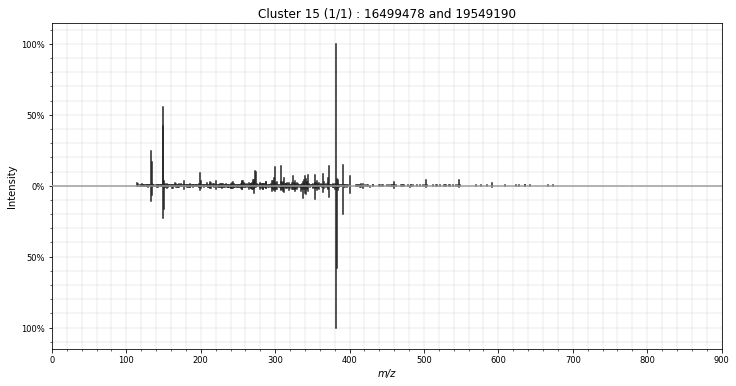

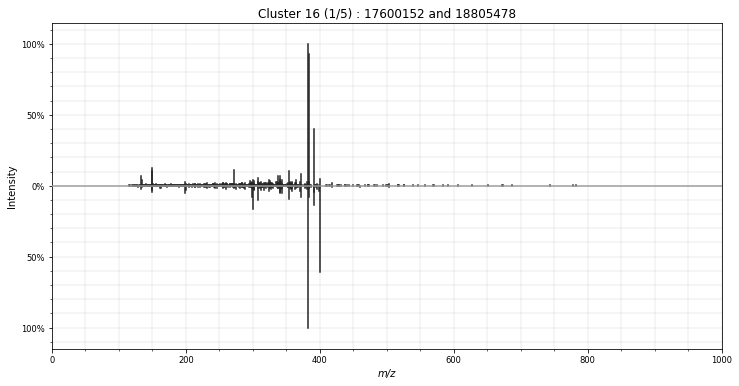

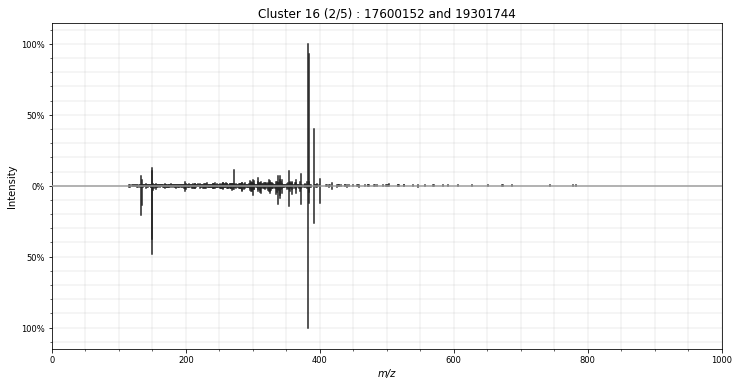

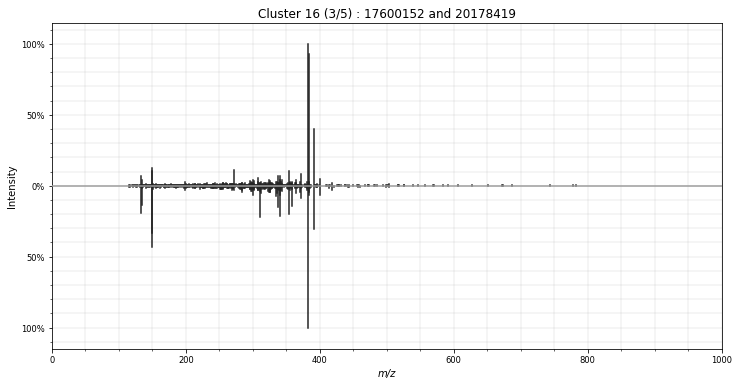

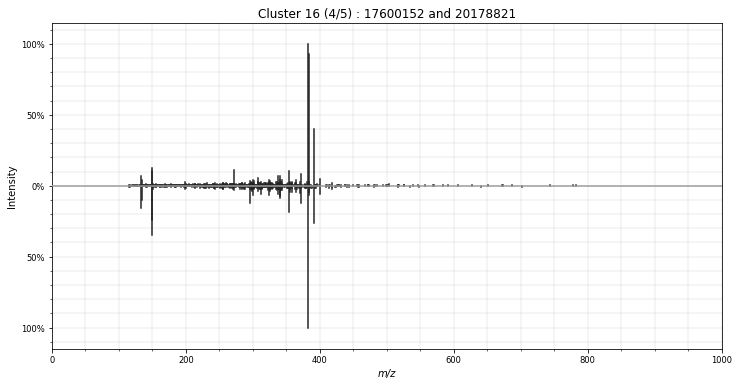

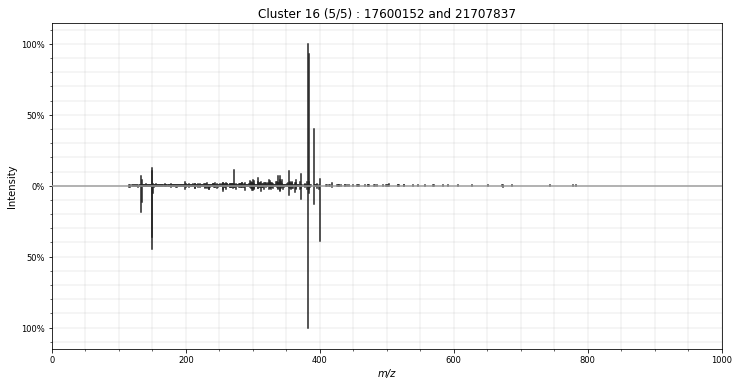

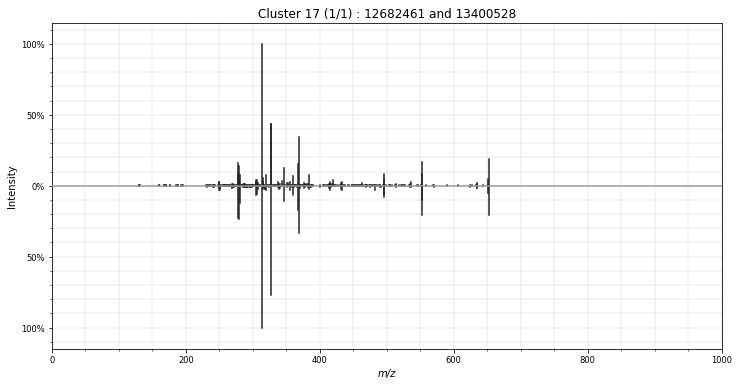

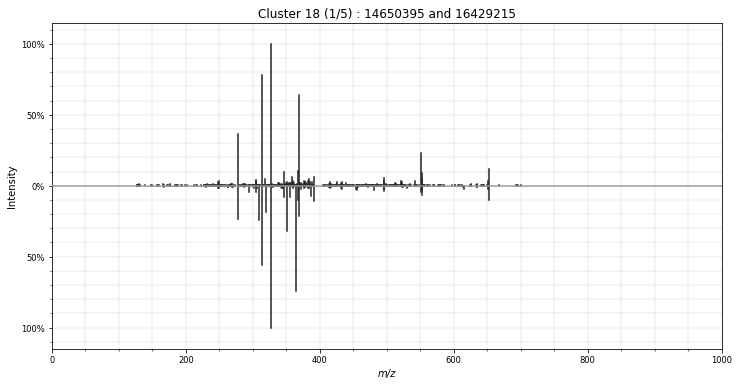

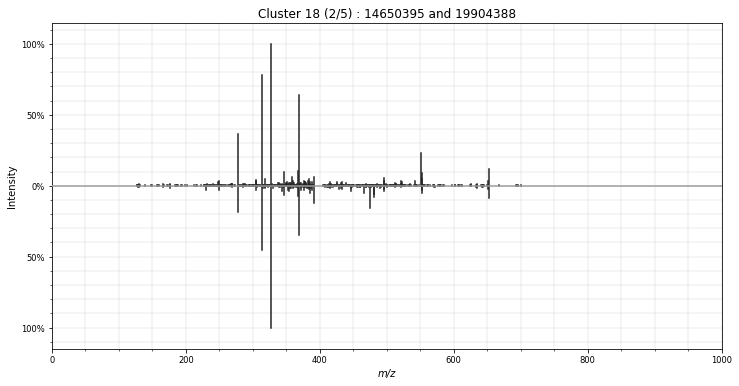

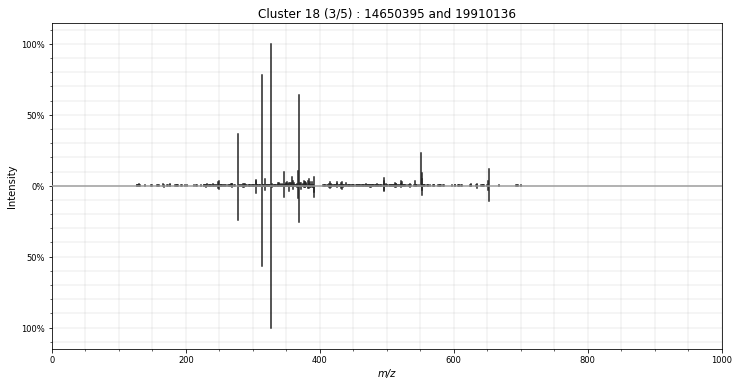

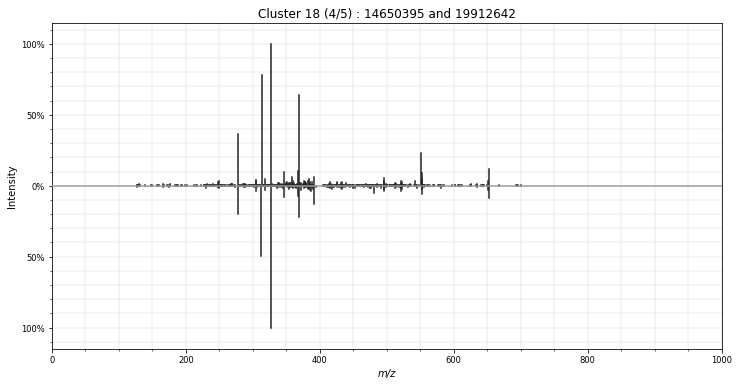

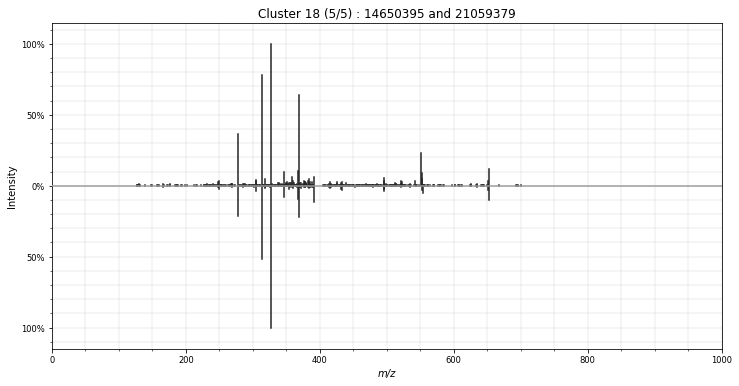

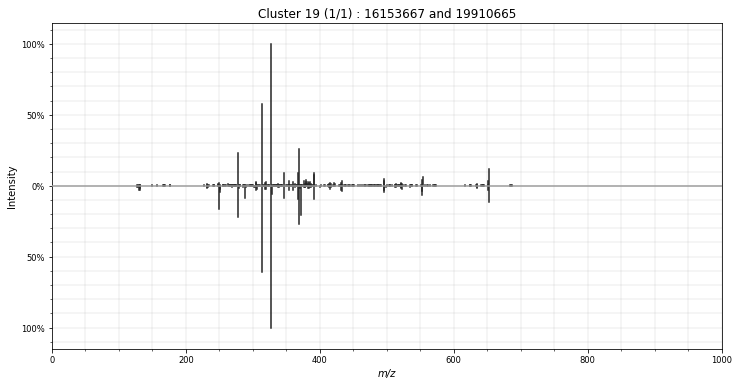

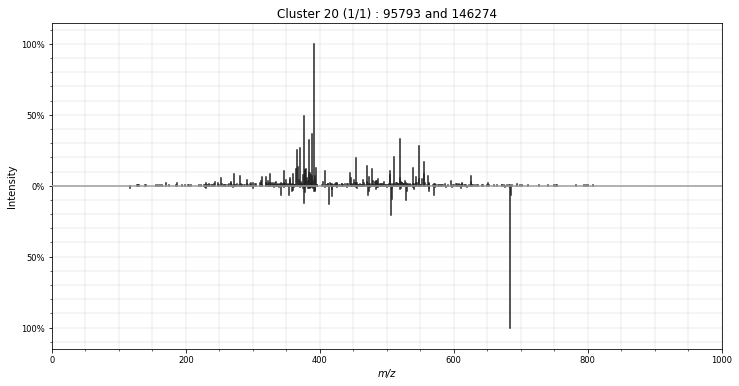

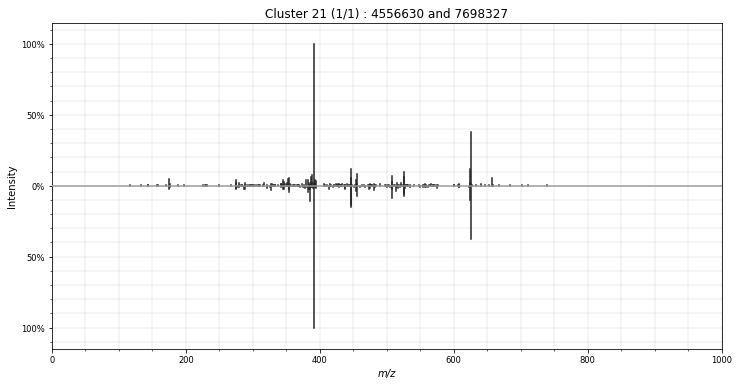

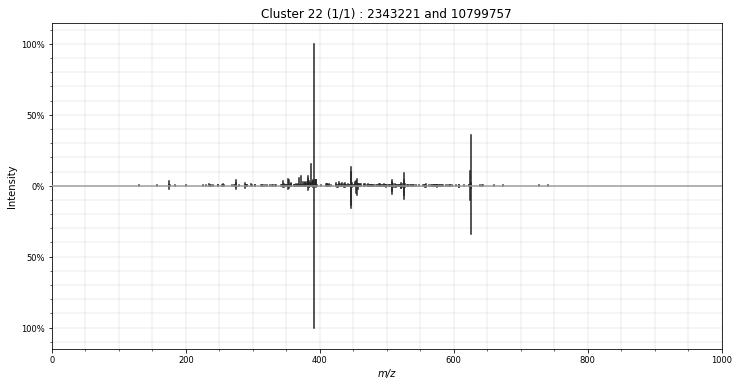

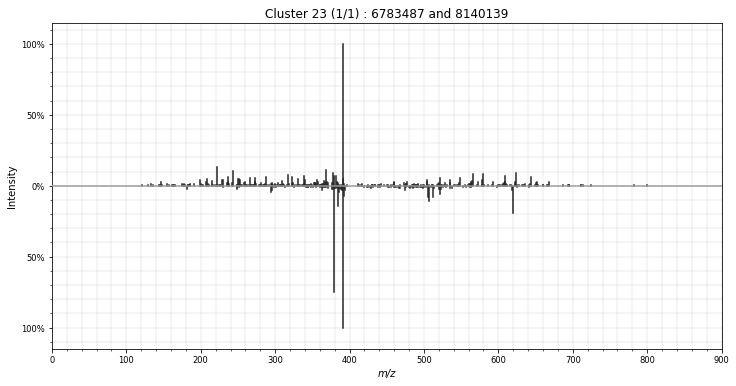

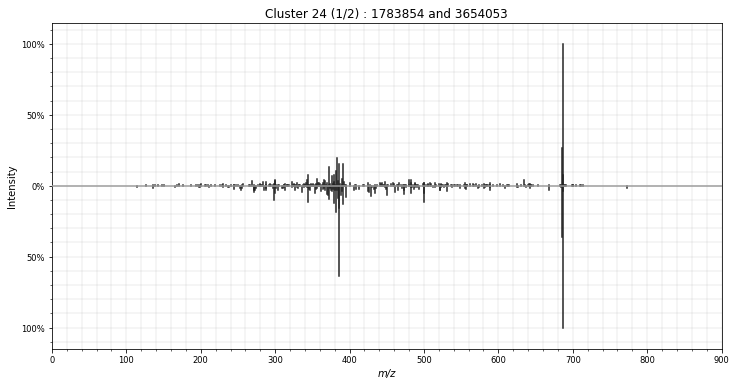

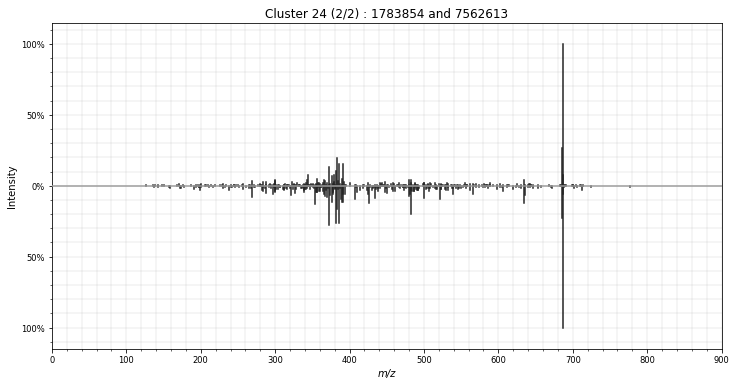

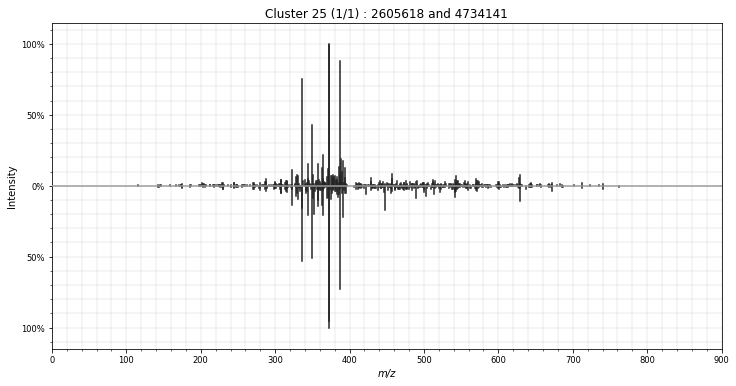

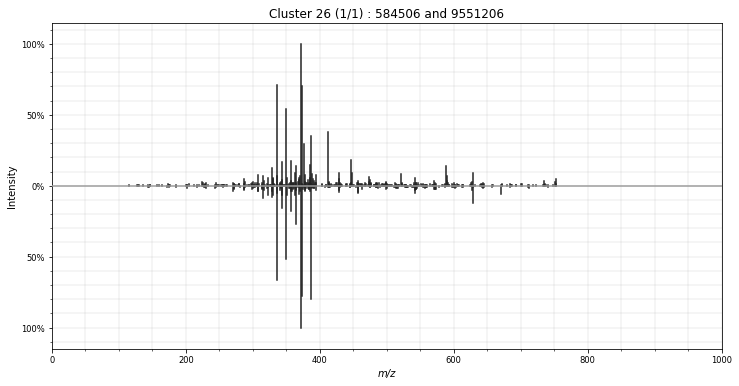

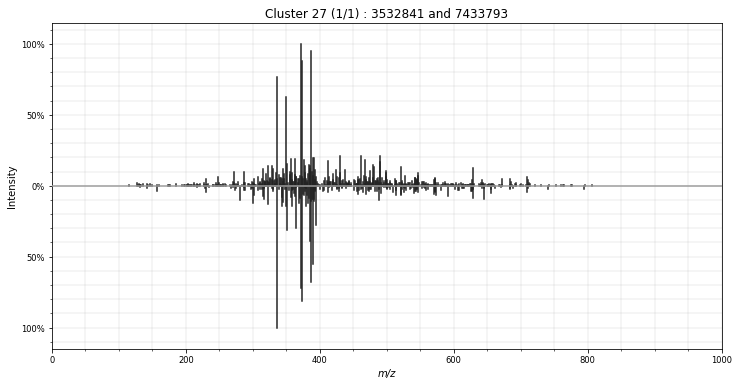

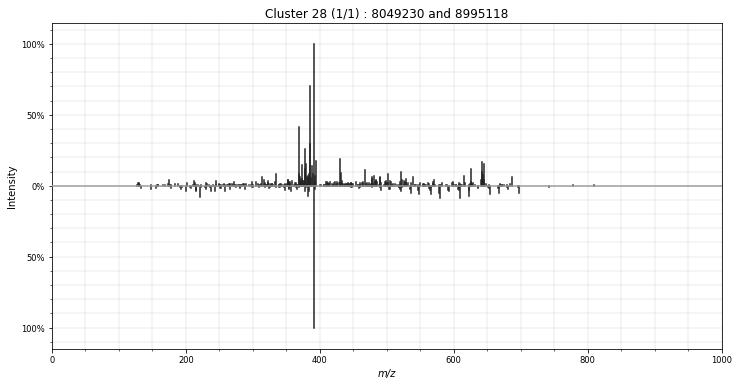

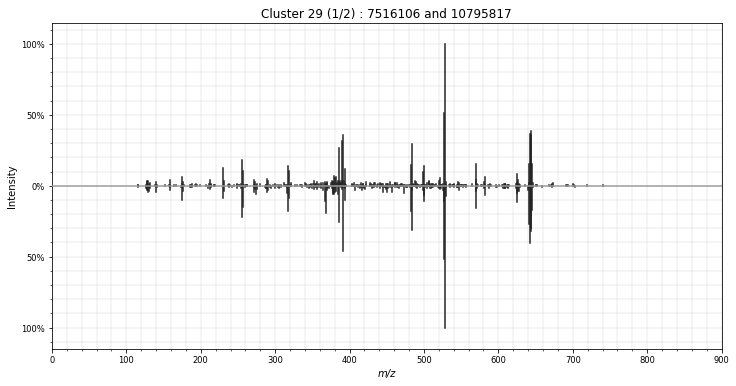

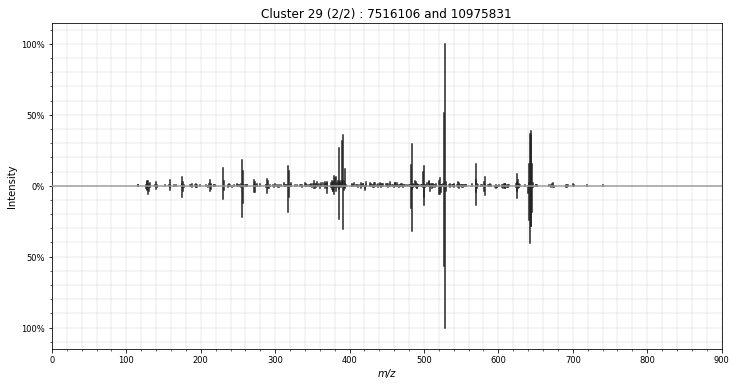

In [11]:
n_cl_plot = 30 # Number of clusters to plot

def extract_pkey(str):
    m = re.search('^.+:([0-9]+)+$', str)
    return int(m.group(1))

dbPath = "../datasets/CCLE_MS2.db"

for i in range(0,n_cl_plot):
    #print("### Cluster {} ###".format(i))
    currDf = clustDf[clustDf.cluster == i]
    sps = currDf.loc[:,"identifier"].tolist()

    spf_pkey = extract_pkey(sps[0])
    spf = ms_io.get_one_spectrum(dbPath, spf_pkey)
    for j in range(1, len(sps)):
        fig, ax = plt.subplots(figsize=(12, 6))
        pkey_j = extract_pkey(sps[j])
        spectrum_top, spectrum_bottom = spf, ms_io.get_one_spectrum(dbPath, pkey_j)
        ax.set_title("Cluster {} ({}/{}) : {} and {}".format(i, j, len(sps)-1, spf_pkey, pkey_j))
        sup.mirror(spectrum_top, spectrum_bottom, ax=ax)
        plt.savefig(f"/home/maesk/tmp/{i}.png", dpi=300)
        plt.show()
        plt.close()